In [1]:
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/setup_colab.sh -O- | bash

    !touch .setup_complete

# This code creates a virtual display to draw game images on.
# It will have no effect if your machine has a monitor.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

Starting virtual X frame buffer: Xvfb.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### OpenAI Gym

We're gonna spend several next weeks learning algorithms that solve decision processes. We are then in need of some interesting decision problems to test our algorithms.

That's where OpenAI Gym comes into play. It's a Python library that wraps many classical decision problems including robot control, videogames and board games.

So here's how it works:

In [ ]:
#!pip3 install pyglet

Observation space: Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)
Action space: Discrete(3)


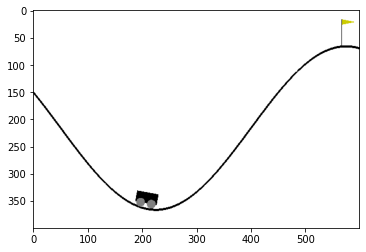

In [3]:
import gym

env = gym.make("MountainCar-v0")
env.reset()
obs_array=env.render('rgb_array')
plt.imshow(env.render('rgb_array'))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

(400, 600)


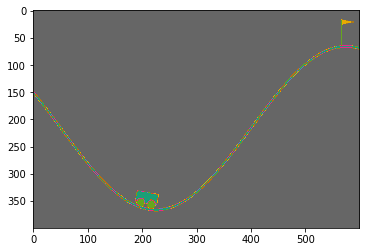

In [4]:
obs_array.shape
# convert to grey scale
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray
print(rgb2gray(obs_array).shape)
plt.imshow(rgb2gray(obs_array),cmap='Dark2')

# from PIL import Image
# img = Image.open('input_file.jpg').convert('L')
# img.save('output_file.jpg')
# import cv2
# import numpy as np

# img = cv2.imread('your_image.jpg')
# res = cv2.resize(img, dsize=(54, 140), interpolation=cv2.INTER_CUBIC)

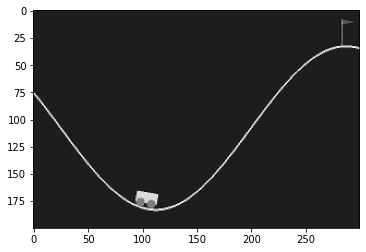

In [5]:
import cv2
img_grey=rgb2gray(obs_array)
res = cv2.resize(img_grey, dsize=(300, 200), interpolation=cv2.INTER_CUBIC)
plt.imshow(res,cmap='binary')


Agent making actions


In [14]:
import numpy as np
class Agent:
    def __init__(self, env, preprocess_obs=None):
        if preprocess_obs is None:
            preprocess_obs = lambda x: x

        self.env = env
        self.action_size = self.env.action_space.n
    
    def set_Fhat(self, F_hat):
        self.F_hat=F_hat

    def set_features_size(self, k):
        self.features_size = k
        self.init_weights()

    def init_weights(self, scale=1.):
        size = self.features_size * self.action_size
        self.weights = np.random.normal(size=size, scale=scale).reshape(self.features_size, self.action_size)

    def set_weights(self, weights):
        #k by n_actions
        self.weights = weights

    def get_features_size(self):
        obs = self.env.observation_space.sample()
        features = self.get_features(obs)
        return len(features)


    def get_features(self, obs):
        # may flatten observations
        #shape 1 by k
        return obs@self.F_hat

    def predict(self, obs):
        values = self.get_features(obs)@self.weights
        # values = np.dot(
        #     self.weights.reshape(self.action_size, self.features_size),
        #     obs)
        action = np.argmax(values)
        return action

In [16]:
aaaaaa=dict()
aaaaaa[0]=[1,2,3,3]
aaaaaa[1]=[1,2,3,3]
aaaaaa.items()

dict_items([(0, [1, 2, 3, 3]), (1, [1, 2, 3, 3])])

Simulate states, actions

In [7]:
from IPython import display

# Create env manually to set time limit. Please don't change this.
TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(
    gym.envs.classic_control.MountainCarEnv(),
    max_episode_steps=TIME_LIMIT + 1,
)
actions = {'left': 0, 'stop': 1, 'right': 2}
def policy(obs, t):
    # Write the code for your policy here. You can use the observation
    # (a tuple of position and velocity), the current time step, or both,
    # if you want.
    position, velocity = obs
    if velocity<0:
        return actions['left']
    else:
        return actions['right']  


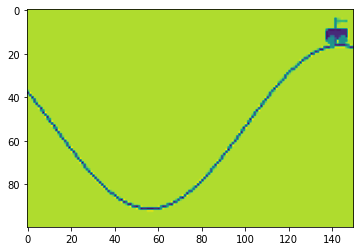

In [7]:
state_img2_sequence=[]
action_sequence=[]
reward_seqeunce=[]
TIME_LIMIT=1000
obs = env.reset()
obs_array=env.render('rgb_array')
img_grey=rgb2gray(obs_array)
res = cv2.resize(img_grey, dsize=(150, 100), interpolation=cv2.INTER_CUBIC)
plt.imshow(res)
prev_state_img = res
#plt.savefig('/content/drive/MyDrive/RL_proj_car_images/car_img_iter'+str(0)+'.png')


##

action = policy(obs, 0)  # Call your policy
obs, reward, done, _ = env.step(action)
obs_array=env.render('rgb_array')
img_grey=rgb2gray(obs_array)
res = cv2.resize(img_grey, dsize=(150, 100), interpolation=cv2.INTER_CUBIC)
    #make a tensor of 2 pictures to incorporate velocity tensor
state_img2=np.zeros([prev_state_img.shape[0],prev_state_img.shape[1],2])
state_img2[:,:,0] = prev_state_img
state_img2[:,:,1] = res

    # saving more wisely  is desired
    #flatten
state_img2_sequence.append(state_img2.flatten())
for t in range(1, TIME_LIMIT):
    plt.gca().clear()
    
    #agent.predict(obs)
    action = policy(obs, t)  # Call your policy
    obs, reward, done, _ = env.step(action)  # Pass the action chosen by the policy to the environment
    
    action_sequence.append(action)
    reward_seqeunce.append(reward)
    # We don't do anything with reward here because MountainCar is a very simple environment,
    # and reward is a constant -1. Therefore, your goal is to end the episode as quickly as possible.

    # Draw game image on display.
    obs_array=env.render('rgb_array')
    img_grey=rgb2gray(obs_array)
    res = cv2.resize(img_grey, dsize=(150, 100), interpolation=cv2.INTER_CUBIC)

    #make a tensor of 2 pictures to incorporate velocity tensor
    state_img2=np.zeros([prev_state_img.shape[0],prev_state_img.shape[1],2])
    #flatten at this stage
    state_img2[:,:,0] = prev_state_img
    state_img2[:,:,1] = res
    # saving more wisely  is desired
    state_img2_sequence.append(state_img2.flatten())

    #visualisation
    plt.imshow(res)
    #plt.savefig('/content/drive/MyDrive/RL_proj_car_images/car_img_iter'+str(t)+'.png')
    display.display(plt.gcf())
    display.clear_output(wait=True)

    #next state:
    prev_state_img = res.copy()
    if done:
        print("Well done!")
        break
else:
    print("Time limit exceeded. Try again.")

display.clear_output(wait=True)

In [16]:
Actions_set=[0,1,2]

def make_A(action_sequence, reward_seqeunce, state_img2_sequence):
    action_sequence=np.array(action_sequence)
    state_img2_sequence=np.array(state_img2_sequence)
    reward_seqeunce=np.array(reward_seqeunce)
    feature_dict_action={}
    feature_next_action={}
    reward_action_dict={}
    for action in Actions_set:
        indices=np.arange(len(action_sequence))
        #print(action_sequence)
        indices_act=indices[action_sequence==action]
        #print(indices_act)
        features = state_img2_sequence[indices_act]

        #print(features.shape)
        features_next = state_img2_sequence[indices_act]
        #[1:][action_sequence==action]
        #print(features_next.shape)
        rewards_a=reward_seqeunce[action_sequence==action]


        feature_dict_action[action]=features
        feature_next_action[action]=features_next
        reward_action_dict[action] = rewards_a



    return feature_dict_action, feature_next_action, reward_action_dict

feature_dict_action, feature_next_action, reward_action_dict = make_A(action_sequence, reward_seqeunce, state_img2_sequence)

In [17]:
import numpy as np
import scipy.linalg as la
from sklearn.utils.extmath import randomized_svd



def calculate_weights(gamma, P_F, r_F):
    '''
    gamma : scalar
           discounted infinite-horizon return
    P_F : matrix k x k
    r_F: vector k
        r_F from r_A = F^(+) @  r_A @ F
    Return : weights k
             r_F + gamma * inverse(I_k - gamma * v @ US) @ (V @ r_F)
    '''
    
    l = US.shape[0]
    k = US.shape[1]
    I_k = np.eye(k)
    
#    return r_F + gamma * (US @ (np.linalg.inv(I_k - gamma * V @ US) @ (V @ r_F))) 
    return np.linalg.inv(I_k - gamma * P_F) @ r_F



def calculate_r_F(F, r_A):
    '''
    F : matrix n x k
        V from SVD(Prob_trans)
    r_A: vector L
        r_A = A^(+) @ rewards
        
    Return : r_F: vector k
        r_F from r_A = np.linalg.pinv(F) @  r_A @ F
    '''
    
    return np.linalg.pinv(F) @ r_A
    

    
def get_features_matrix_hat(P_A, r_A):
    '''
    P_A : matrix l x l
        matrix transition probabilities
    r_A : vector l
        compressed reward vector 
        
    Return : F_hat : feature matrix for P_A
        see return algorithm 2 from article
    '''
    
    U, S, V_T = randomized_svd(M=P_A, n_components=k, n_iter=5)
    l = U.shape[0]
    
    F_hat = np.append(U[:, :(k - 1)], r_A.reshape(l, 1), axis=1)
    
    US = U @ S
    US = U * S.reshape(1, -1)
     
    return F_hat, US, V_T.T

    
def get_features_matrix(P_A, r_A, A_current):
    '''
    P_A : matrix l x l
        matrix transition probabilities
    r_A : vector l
        compressed reward vector 
        
    A : matrix n x l
        matrix for current state
        
    Return : F_hat : feature matrix for P_A
        see return algorithm 2 from article
    '''
    F_hat, US, V = get_features_matrix_hat(P_A, r_A)
    
    return A_current @ F_hat, US, V
 

def get_P_F(P_A, F_hat):
    '''
    P_A : matrix l x l
        matrix transition probabilities
    F: matrix l x k
        feature matrix
        
    Return : P_F
    '''
    
    
    return np.linalg.pinv(F_hat) @ P_A @ F_hat
 




def LRA(A, r, method='svd', max_iter=16):
    if method=='svd':
        U, s, V = la.svd(A)
        return U[:,:r]*s[:r].reshape(1, -1), V[:r,:]
    if method=='eigen':
        w, vr = la.eig(A, right=True)
        ind = np.argpartition(np.abs(w), w.shape[0]-r)[-r:]
        return vr[:, ind]*w[ind], la.inv(vr)[ind, :]
    if method=='lfd':
        D = np.random.rand(r, A.shape[1])
        E = np.random.rand(A.shape[1], r)
        diff, i = np.inf, 0
        while la.norm(E@D - A) < diff and i < max_iter:
            diff = la.norm(E@D - A)
            E = A @ la.pinv(D)
            D = la.pinv(E) @ A
            i += 1
        return E, D
    raise ValueError('Unidentified method')

In [34]:
np.random.rand()

0.10150978278481071

In [36]:
import cv2


def Sample_agent_policy(env, agent = None, is_agent = False):

  actions = {'left': 0, 'stop': 1, 'right': 2}
  def policy(obs, t):
    # epsilon greedy
    # Write the code for your policy here. You can use the observation
    # (a tuple of position and velocity), the current time step, or both,
    # if you want.
    if np.random.rand()>0.8: 
      return np.random.choice(3)
    else:
      position, velocity = obs
      if velocity<0:
        return actions['left']
      else:
        return actions['right']  

  def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray
  def grey_and_scale(img):
#    return cv2.resize(rgb2gray(img), dsize=(150, 100), interpolation=cv2.INTER_CUBIC)
    return cv2.resize(rgb2gray(img), dsize=(40, 60), interpolation=cv2.INTER_CUBIC)


  state_img2_sequence=[]
  action_sequence=[]
  reward_seqeunce=[]
  TIME_LIMIT=500
  obs = env.reset()
  obs_array=env.render('rgb_array')

  res =grey_and_scale(obs_array)
  plt.imshow(res)
  prev_state_img = res

  action = policy(obs, 0)  # Call your policy

  obs, reward, done, _ = env.step(action)
  obs_array=env.render('rgb_array')
  res=grey_and_scale(obs_array)
      #make a tensor of 2 pictures to incorporate velocity tensor
  state_img2=np.zeros([prev_state_img.shape[0],prev_state_img.shape[1],2])
  state_img2[:,:,0] = prev_state_img
  state_img2[:,:,1] = res

  # saving more wisely  is desired
   #flatten
  state_img2_sequence.append(state_img2.flatten())
  for t in range(1, TIME_LIMIT):
      plt.gca().clear()
      
      #agent.predict(obs)
      if is_agent:
        action = agent.predict(state_img2_sequence[-1])
      else:
        action = policy(obs, t)
        # Call your policy
      obs, reward, done, _ = env.step(action)  # Pass the action chosen by the policy to the environment
      
      action_sequence.append(action)
      reward_seqeunce.append(reward)
      # We don't do anything with reward here because MountainCar is a very simple environment,
      # and reward is a constant -1. Therefore, your goal is to end the episode as quickly as possible.

      # Draw game image on display.
      obs_array=env.render('rgb_array')
      res = grey_and_scale(obs_array)

      #make a tensor of 2 pictures to incorporate velocity tensor
      state_img2=np.zeros([prev_state_img.shape[0],prev_state_img.shape[1],2])
      #flatten at this stage
      state_img2[:,:,0] = prev_state_img
      state_img2[:,:,1] = res
      # saving more wisely  is desired
      state_img2_sequence.append(state_img2.flatten())

      #visualisation
      plt.imshow(res)
      
      display.display(plt.gcf())
      display.clear_output(wait=True)

      #next state:
      prev_state_img = res.copy()
      if done:
          print("Well done!")
          break
  else:
      print("Time limit exceeded. Try again.")

  display.clear_output(wait=True)
  return state_img2_sequence, action_sequence, reward_seqeunce

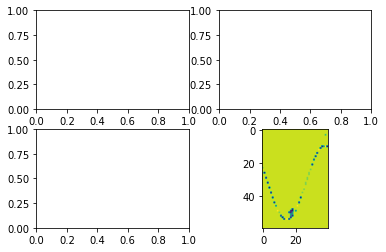

In [ ]:
#from scipy.sparse.linalg import svds


from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd
from tqdm import tqdm
#from scipy.sparse import csr_matrix

k = 10

Agent_lspi=Agent(env)
Agent_lspi.set_features_size(k)
gamma=0.9
iterations=10

for i in range(iterations):
    # sample according policy predicted by updated weight for 
    # make_A
    #get features and features_next
    #rewards for each action
    # A state_action1 state_action1 by n_features(40) 30000 full rank 

    # A@A.T  state_action1 by state_action1 40 by 40
    #A_next state_action1 by n_features
    #for each action
    
    if (i==0):
        print("hello world")
        state_img2_sequence, action_sequence, reward_seqeunce = Sample_agent_policy(env, agent=None, is_agent=False)
    else:
        state_img2_sequence, action_sequence, reward_seqeunce = Sample_agent_policy(env, agent=Agent_lspi, is_agent=True)
    

    feature_dict_action, feature_next_action,\
    reward_action_dict = make_A(action_sequence,
                               reward_seqeunce, state_img2_sequence)
  

    fig, axs = plt.subplots(nrows=2, ncols=2) 
  #A_current, A_next , reward_A = make_A(action_sequence, reward_seqeunce, state_img2_sequence)
    weights_action_list=[]
    weigths_true_action_dict = {}
    for action in tqdm(Actions_set):
        if (feature_next_action[action].shape[0] == 0):
            weights_action_list.append(np.random.rand(k))
            continue
            
        A_next = feature_next_action[action]
        A_current = feature_dict_action[action]
        reward_A = reward_action_dict[action]
        #inverse_moore = A_current.T@np.linalg.inv(A_current@A_current.T)
        # A_current@inverse_moore = I
        #state_action1 n_features
        #np.pinv(A)
        # n_features by n_features
#        import pdb; pdb.set_trace()
        Prob_A = la.pinv(A_current) @ A_next
#        Prob_A = np.linalg.inv(A_current.T @ A_current) @ A_current.T @ A_next
        print("Prob a")
        r_A =la.pinv(A_current) @ reward_A
        print(" r_A")
#        F_hat, US, V = get_features_matrix_hat(Prob_A, r_A)
#        import pdb; pdb.set_trace()
#        pdb.set_trace()
        F, US, V = get_features_matrix(Prob_A, r_A, A_current)
        F_hat, _ , _  = get_features_matrix_hat(Prob_A, r_A)
        Agent_lspi.set_Fhat(F_hat)

        print('LRA')

        r_F = calculate_r_F(F, reward_A)
        
        P_F = get_P_F(Prob_A, F_hat)
        weights_action = calculate_weights(gamma, P_F, r_F)
        print(weights_action.shape)
        print('weights_action')
        
        weigths_true_action_dict[action] = F_hat @ weights_action

        weights_action_list.append(weights_action)
        weights_true_action = F_hat @ weights_action 
        weights_true_action = weights_true_action.reshape(60, 40, 2)
        if (action == 0):
            axs[0, 0].imshow(weights_true_action[:,:,0])
            axs[0, 0].set_title("Fig 1. Action left")
            axs[0, 1].imshow(weights_true_action[:,:,1])
            axs[0, 1].set_title("Fig 2. Action left")
        if (action == 2):
            axs[1, 0].imshow(weights_true_action[:,:,0])
            axs[1, 0].set_title("Fig 1. Action right")
            axs[1, 1].imshow(weights_true_action[:,:,1])
            axs[1, 1].set_title("Fig 2. Action right")
#        plt.imshow(weights_true_action[:,:,0])
#        plt.imshow(weights_true_action[:,:])
        #plot weights_action. cmap 
        #update policy according to new weights_action
    weight_matrix = np.stack(weights_action_list)
    print(weight_matrix.shape)
    Agent_lspi.set_weights(weight_matrix.T)

In [ ]:
np.sqrt(2000)

In [ ]:
import numpy as np 

n = 3000
A = np.random.random((n, n))
np.linalg.pinv(A)

array([[ 0.04478354,  0.02909084,  0.03785851, ...,  0.01123415,
         0.04183728,  0.00234701],
       [ 0.00179641, -0.01342547, -0.00664226, ..., -0.00463774,
        -0.00229532,  0.00213908],
       [-0.02902286,  0.0675748 , -0.03355641, ...,  0.05730085,
        -0.05403108,  0.01059323],
       ...,
       [ 0.03139422, -0.04301666,  0.0666454 , ..., -0.10459897,
        -0.03851908,  0.00121881],
       [ 0.02967128, -0.03230923,  0.08405059, ..., -0.0807908 ,
        -0.04957663, -0.02846655],
       [-0.01120274, -0.00017998, -0.05142193, ...,  0.03587175,
         0.02111265, -0.00611361]])

In [ ]:
an_array = np.array([[1, 2], [3, 4]])


new_column = [[3], [6]]

an_array = np.append(an_array, new_column, axis=1)
print(an_array)


[[1 2 3]
 [3 4 6]]


In [ ]:
print(V.shape)
print(US.shape)
del Prob_A

In [ ]:
#US=US*s.reshape(1, -1)
    #US, V = LRA(Prob_A, r=100)
print('LRA')
    # weights_action optimization 
Inv_Woodbury = Woodbury(0.9, US, V)
    
weights_action=calculate_weights(Inv_Woodbury, r_A)
weights_action_dict[action]=weights_action

weights_action.reshape(150, 100, 2)
plt.imshow(weights_action[:,:,0])

LRA


Note: if you're running this on your local machine, you'll see a window pop up with the image above. Don't close it, just alt-tab away.

### Gym interface

The three main methods of an environment are
* `reset()`: reset environment to the initial state, _return first observation_
* `render()`: show current environment state (a more colorful version :) )
* `step(a)`: commit action `a` and return `(new_observation, reward, is_done, info)`
 * `new_observation`: an observation right after committing the action `a`
 * `reward`: a number representing your reward for committing action `a`
 * `is_done`: True if the MDP has just finished, False if still in progress
 * `info`: some auxiliary stuff about what just happened. For now, ignore it.

In [ ]:
obs0 = env.reset()
print("initial observation code:", obs0)

# Note: in MountainCar, observation is just two numbers: car position and velocity

initial observation code: [-0.52586437  0.        ]


In [ ]:
?np.append

Actions:
1.   0 left
2.   1 no step
3.   2 right 


In [ ]:
?np.append


taking action 2 (right)
new observation code: [-0.55395261  0.00123657]
reward: -1.0
is game over?: False


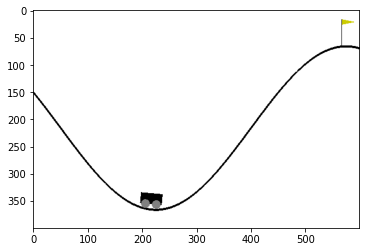

In [ ]:
print("taking action 2 (right)")

new_obs, reward, is_done, _ = env.step(2)
                                       
plt.imshow(env.render('rgb_array'))
print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)

# Note: as you can see, the car has moved to the right slightly (around 0.0005)

### Play with it

Below is the code that drives the car to the right. However, if you simply use the default policy, the car will not reach the flag at the far right due to gravity.

__Your task__ is to fix it. Find a strategy that reaches the flag. 

You are not required to build any sophisticated algorithms for now, and you definitely don't need to know any reinforcement learning for this. Feel free to hard-code :)

In [ ]:
from IPython import display

# Create env manually to set time limit. Please don't change this.
TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(
    gym.envs.classic_control.MountainCarEnv(),
    max_episode_steps=TIME_LIMIT + 1,
)
actions = {'left': 0, 'stop': 1, 'right': 2}

In [ ]:
actions = {'left': 0, 'stop': 1, 'right': 2}
def policy(obs, t):
    # Write the code for your policy here. You can use the observation
    # (a tuple of position and velocity), the current time step, or both,
    # if you want.
    position, velocity = obs
    if velocity<0:
      return actions['left']
    else:
      return actions['right']  

    # This is an example policy. You can try running it, but it will not work.
    # Your goal is to fix that. You don't need anything sophisticated here,
    # and you can hard-code any policy that seems to work.
    # Hint: think how you would make a swing go farther and faster.
    #return actions['right']

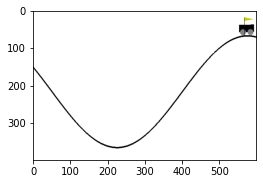

In [ ]:
plt.figure(figsize=(4, 3))
display.clear_output(wait=True)

obs = env.reset()
for t in range(TIME_LIMIT):
    plt.gca().clear()
    
    action = policy(obs, t)  # Call your policy
    obs, reward, done, _ = env.step(action)  # Pass the action chosen by the policy to the environment
    
    # We don't do anything with reward here because MountainCar is a very simple environment,
    # and reward is a constant -1. Therefore, your goal is to end the episode as quickly as possible.

    # Draw game image on display.
    plt.imshow(env.render('rgb_array'))
    plt.savefig('/content/drive/MyDrive/RL_proj_car_images/car_img_iter'+str(t)+'.png')
    display.display(plt.gcf())
    display.clear_output(wait=True)

    if done:
        print("Well done!")
        break
else:
    print("Time limit exceeded. Try again.")

display.clear_output(wait=True)

In [ ]:
print('It took step', t)

It took step 122


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
assert obs[0] > 0.47
print("You solved it!")

Try random policy

In [ ]:
np.random.choice([0,1,2])

1

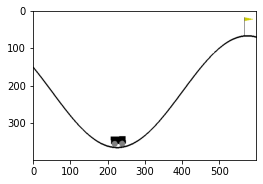

In [ ]:
def rand_policy(obs, t):
    return np.random.choice([0,1,2])
TIME_LIMIT=500
plt.figure(figsize=(4, 3))
display.clear_output(wait=True)

obs = env.reset()
for t in range(TIME_LIMIT):
    plt.gca().clear()
    
    action = rand_policy(obs, t)  # Call your policy
    obs, reward, done, _ = env.step(action)  # Pass the action chosen by the policy to the environment
    
    # We don't do anything with reward here because MountainCar is a very simple environment,
    # and reward is a constant -1. Therefore, your goal is to end the episode as quickly as possible.

    # Draw game image on display.
    plt.imshow(env.render('rgb_array'))
    #plt.savefig('/content/drive/MyDrive/RL_proj_car_images/car_img_iter'+str(t)+'.png')
    display.display(plt.gcf())
    display.clear_output(wait=True)

    if done:
        print("Well done!")
        break
else:
    print("Time limit exceeded. Try again.")

display.clear_output(wait=True)